In [211]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [212]:
# Load the dataset
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine['type'] = 0  
white_wine['type'] = 1  

# Basic Data Exploration
print("First 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())


First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8      

Data Visualization

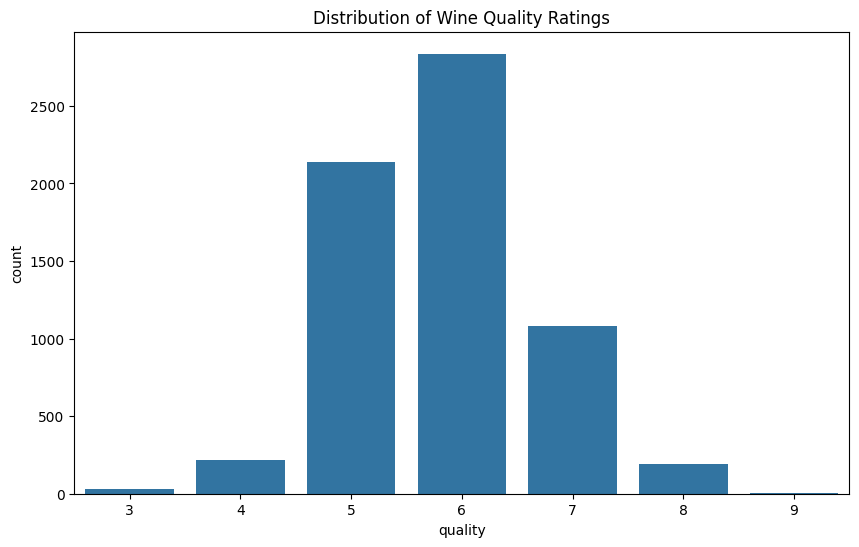

In [213]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.show()


Data Preprocessing
Convert quality to binary classification (good/bad)

In [214]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [215]:
# Classification (Random Forest)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

         bad       0.75      0.73      0.74       451
        good       0.86      0.87      0.87       849

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300


Confusion Matrix:
[[331 120]
 [110 739]]

Accuracy: 0.823076923076923


In [216]:
# Feature Importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
                       importance
alcohol                 0.158031
volatile acidity        0.115295
density                 0.105665
chlorides               0.085314
total sulfur dioxide    0.085205
free sulfur dioxide     0.080369
citric acid             0.076856
sulphates               0.076434
residual sugar          0.075877
pH                      0.071814
fixed acidity           0.064879
type                    0.004262


## linear regression

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [218]:
# Load and combine both datasets (0 for red wine, 1 for white wine)
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine['type'] = 0  
white_wine['type'] = 1  

# Set data
df = pd.concat([red_wine, white_wine], ignore_index=True)
X = df.drop('quality', axis=1)  # Features
y = df['quality']               # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [219]:
# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score: %.2f" % r2_score(y_test, y_pred))


Model Evaluation:
Coefficients: [ 9.21330302e-02 -1.50880993e+00 -9.78878286e-02  6.28216515e-02
 -5.82631627e-01  5.97790423e-03 -1.63243044e-03 -1.02081690e+02
  5.27633123e-01  7.63015400e-01  2.32593705e-01 -3.35208372e-01]
Intercept: 102.63880022906928
Mean Squared Error (MSE): 0.54
Root Mean Squared Error (RMSE): 0.74
R² Score: 0.27


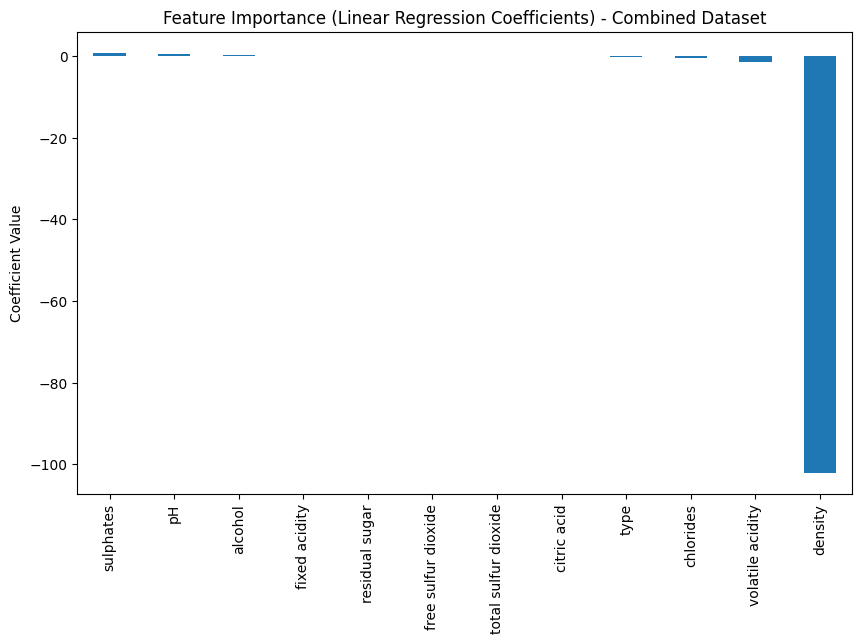

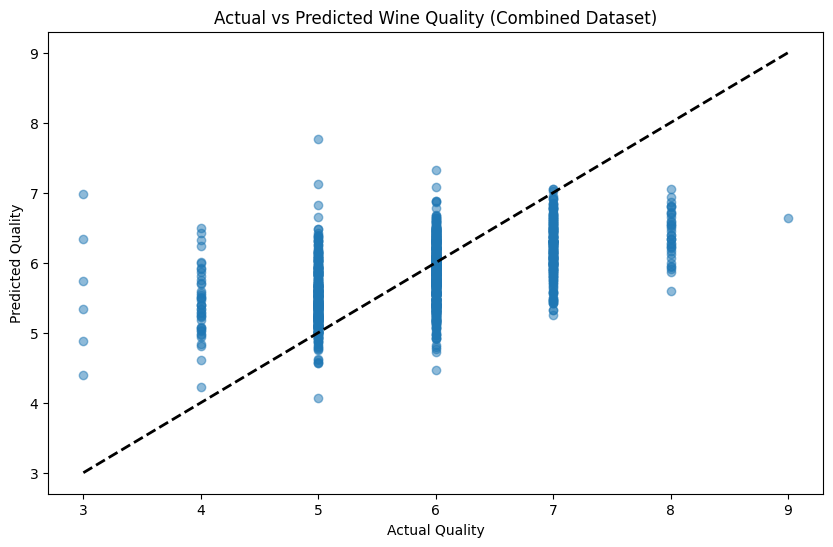

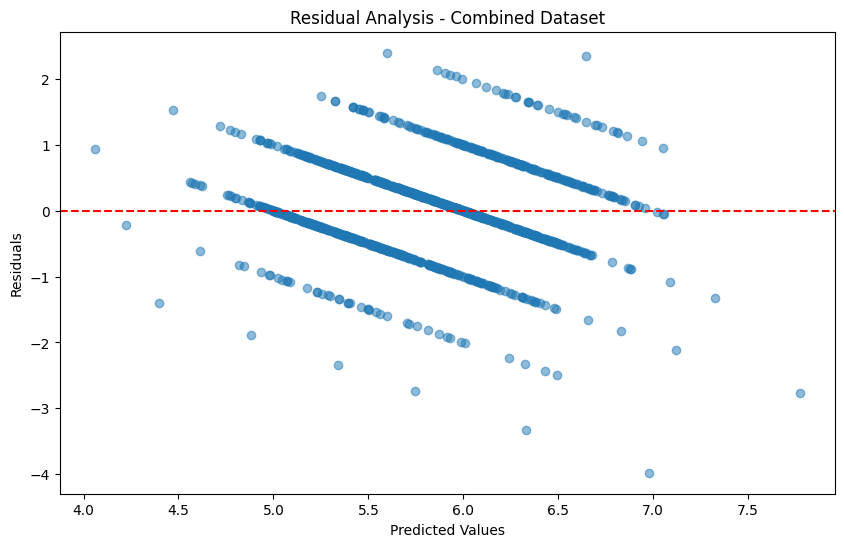

In [220]:
# Feature importance visualization
features = X.columns
coefficients = pd.DataFrame(lr.coef_, index=features, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
coefficients['Coefficient'].plot(kind='bar')
plt.title('Feature Importance (Linear Regression Coefficients) - Combined Dataset')
plt.ylabel('Coefficient Value')
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality (Combined Dataset)')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis - Combined Dataset')
plt.show()

In [221]:
# Sample prediction
sample_wine = X_test.iloc[0:1]  # Take first test sample
predicted_quality = lr.predict(sample_wine)

print("\nSample Prediction:")
print(f"Features:\n{sample_features}")
print("Actual quality:", y_test.iloc[0])
print("Predicted quality:", round(predicted_quality[0], 1))


Sample Prediction:
Features:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3103            7.0              0.17         0.74            12.8      0.045   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3103                 24.0                 126.0   0.9942  3.26       0.38   

      alcohol  type  
3103     12.2     1  
Actual quality: 8
Predicted quality: 6.7


# random forest

In [222]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [223]:
# Load and combine both datasets (0 for red wine, 1 for white wine)
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine['type'] = 0  
white_wine['type'] = 1  

# Set data
df = pd.concat([red_wine, white_wine], ignore_index=True)
X = df.drop('quality', axis=1)  # Features
y = df['quality']               # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [224]:
# Create and train the Random Forest model
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=5,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("\nModel Evaluation (Combined Dataset):")
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score: %.2f" % r2_score(y_test, y_pred))


Model Evaluation (Combined Dataset):
Mean Squared Error (MSE): 0.51
Root Mean Squared Error (RMSE): 0.71
R² Score: 0.31


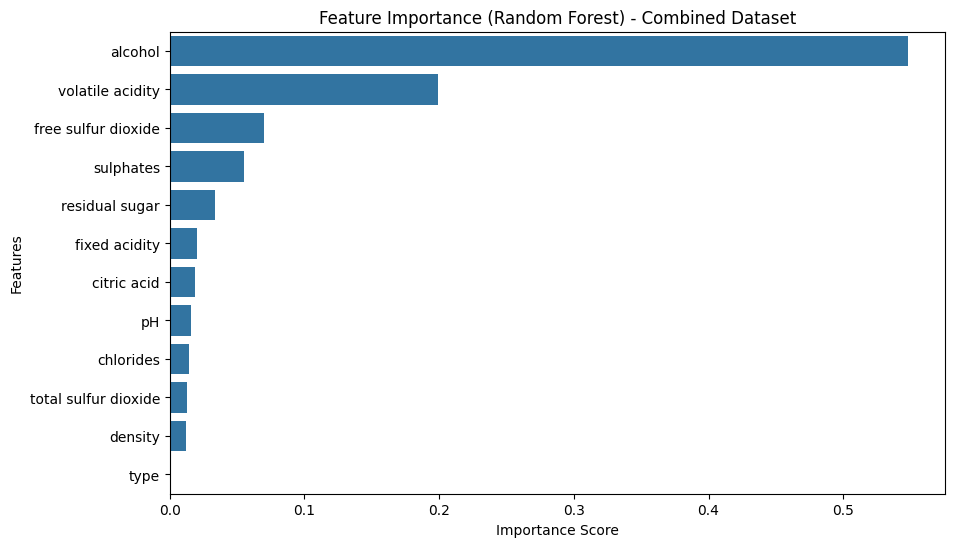

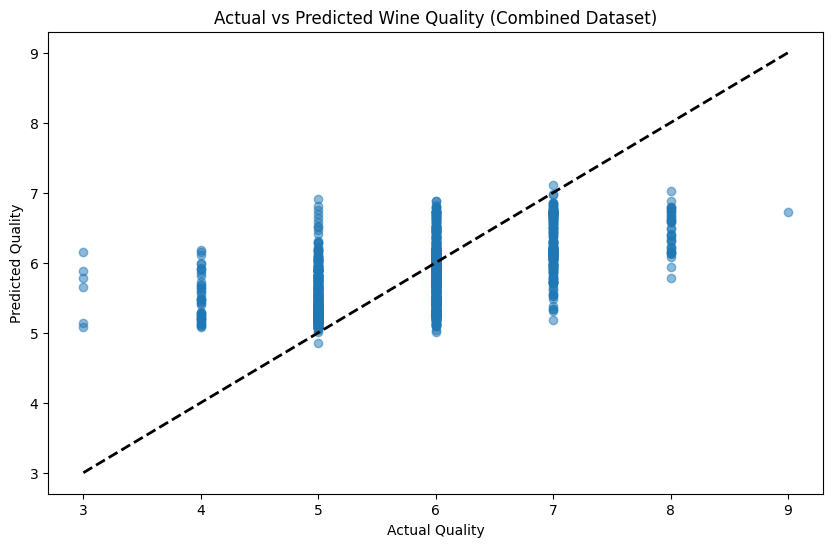

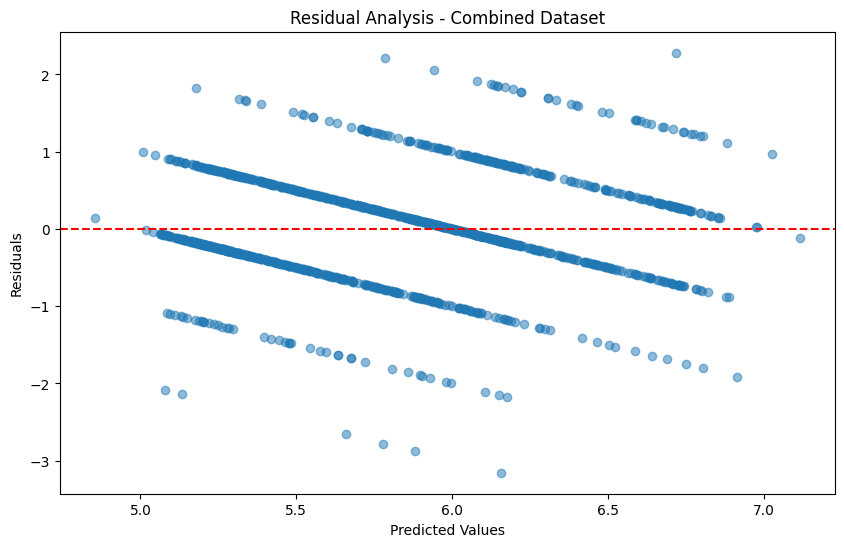

In [225]:
# Feature Importance
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance (Random Forest) - Combined Dataset')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Actual vs Predicted values visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality (Combined Dataset)')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis - Combined Dataset')
plt.show()

In [226]:
# Sample prediction
sample_index = 0
sample_features = X_test.iloc[sample_index:sample_index+1]
actual_quality = y_test.iloc[sample_index]
predicted_quality = rf.predict(sample_features)[0]

print("\nSample Prediction:")
print(f"Features:\n{sample_features}")
print("Actual quality:", actual_quality)
print("Predicted quality:", round(predicted_quality, 1))


Sample Prediction:
Features:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3103            7.0              0.17         0.74            12.8      0.045   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3103                 24.0                 126.0   0.9942  3.26       0.38   

      alcohol  type  
3103     12.2     1  
Actual quality: 8
Predicted quality: 6.6


# compare

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [228]:
# Load data
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

red['type'] = 'red'
white['type'] = 'white'

#combine dataset and set 0 for red wine, 1 for white wine
df = pd.concat([red, white], ignore_index=True)
df['type'] = df['type'].map({'red': 0, 'white': 1})

X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [229]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train models and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'residuals': y_test - y_pred,
        'metrics': {
            'MSE': mean_squared_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R²': r2_score(y_test, y_pred)
        }
    }


In [230]:
metrics_df = pd.DataFrame({k: v['metrics'] for k, v in results.items()}).T
print("Model Performance Comparison:")
print(metrics_df)

Model Performance Comparison:
                        MSE      RMSE       MAE        R²
Linear Regression  0.541238  0.735689  0.564413  0.267157
Random Forest      0.369940  0.608227  0.436754  0.499097


Compare Feature importance visualization

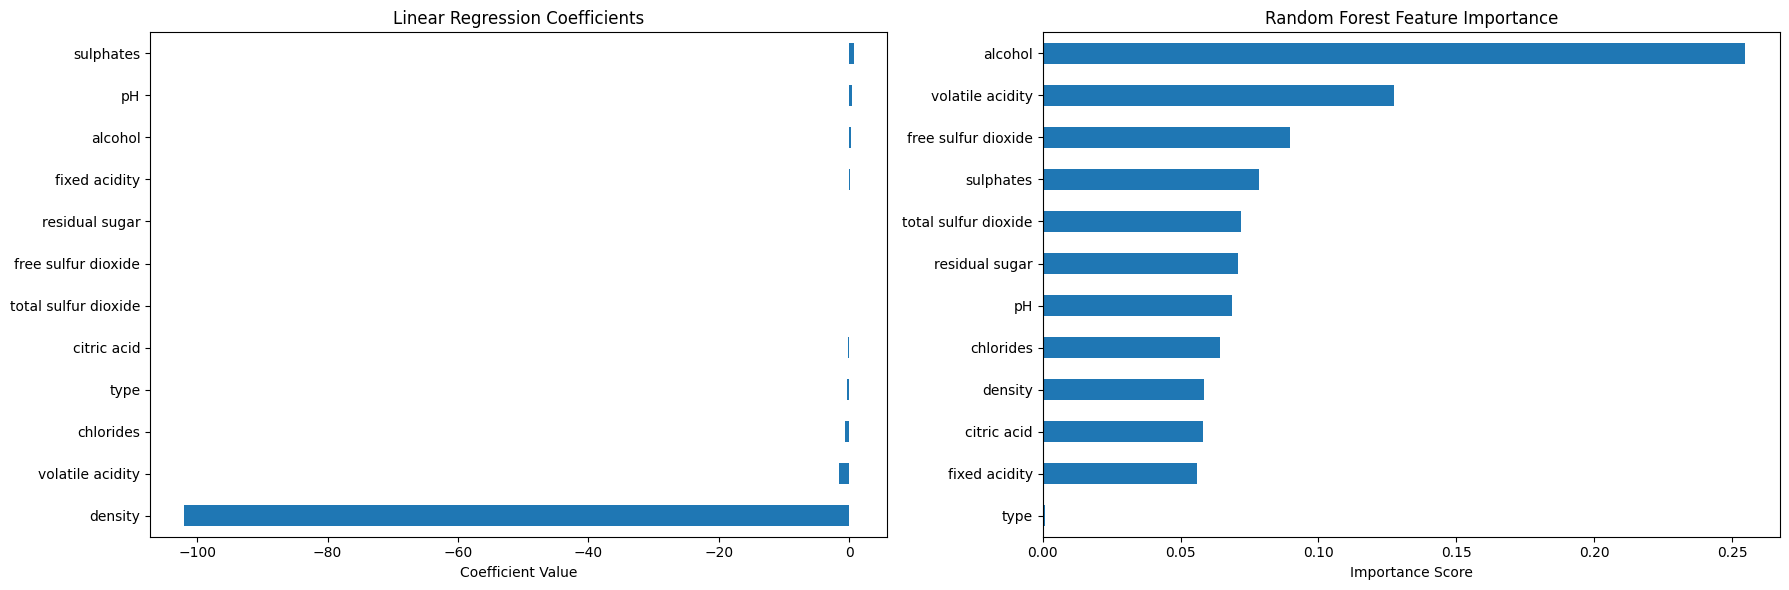

In [231]:
plt.figure(figsize=(18, 6))

# Linear Regression Coefficients
plt.subplot(1, 2, 1)
lr_coef = pd.Series(results['Linear Regression']['model'].coef_, index=X.columns)
lr_coef.sort_values().plot(kind='barh')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')

# Random Forest Feature Importance
plt.subplot(1, 2, 2)
rf_importance = pd.Series(results['Random Forest']['model'].feature_importances_, index=X.columns)
rf_importance.sort_values().plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

Compare Actual vs Predicted Values

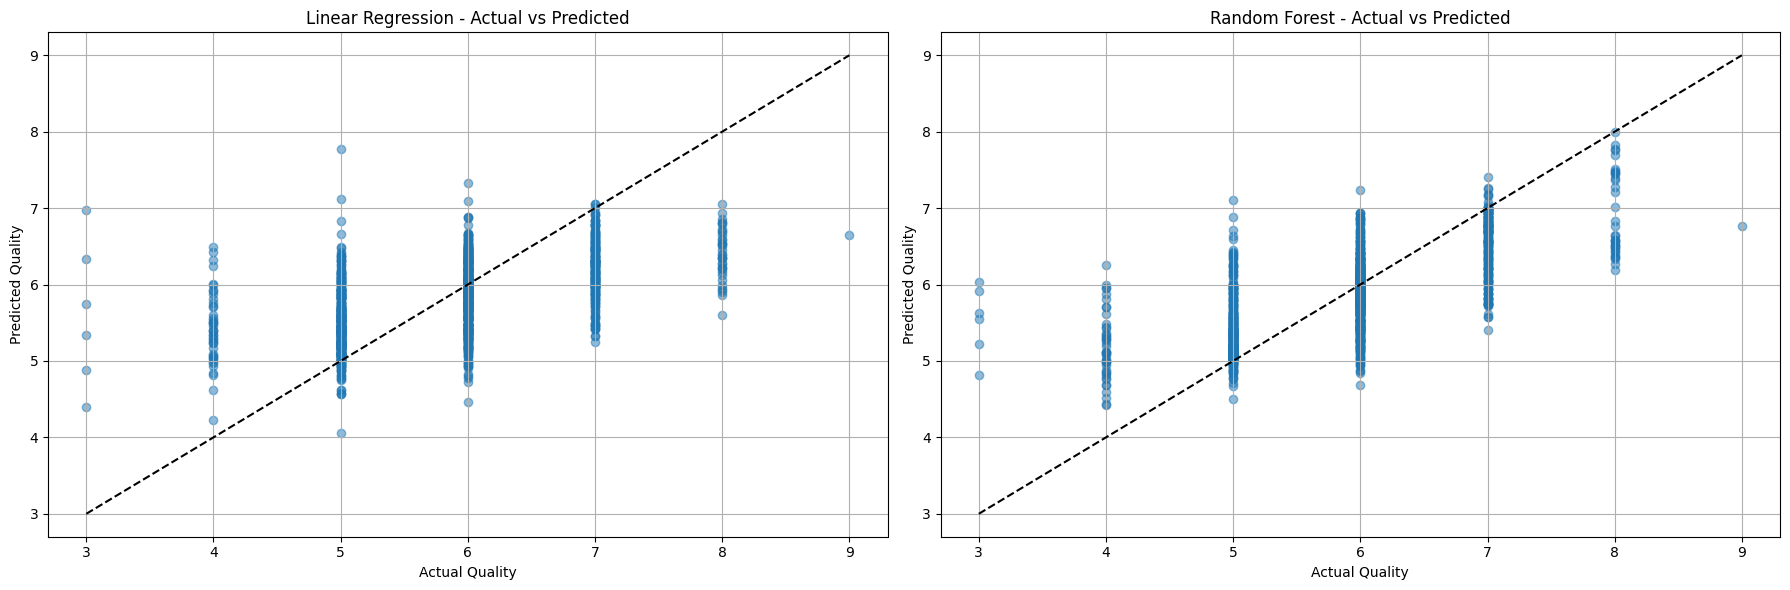

In [232]:
plt.figure(figsize=(18, 6))

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 2, i)
    plt.scatter(y_test, result['predictions'], alpha=0.5)
    plt.plot([3, 9], [3, 9], 'k--')  # Perfect prediction line
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual Quality')
    plt.ylabel('Predicted Quality')
    plt.grid(True)
    
plt.tight_layout()
plt.show()

Compare Residual Plots

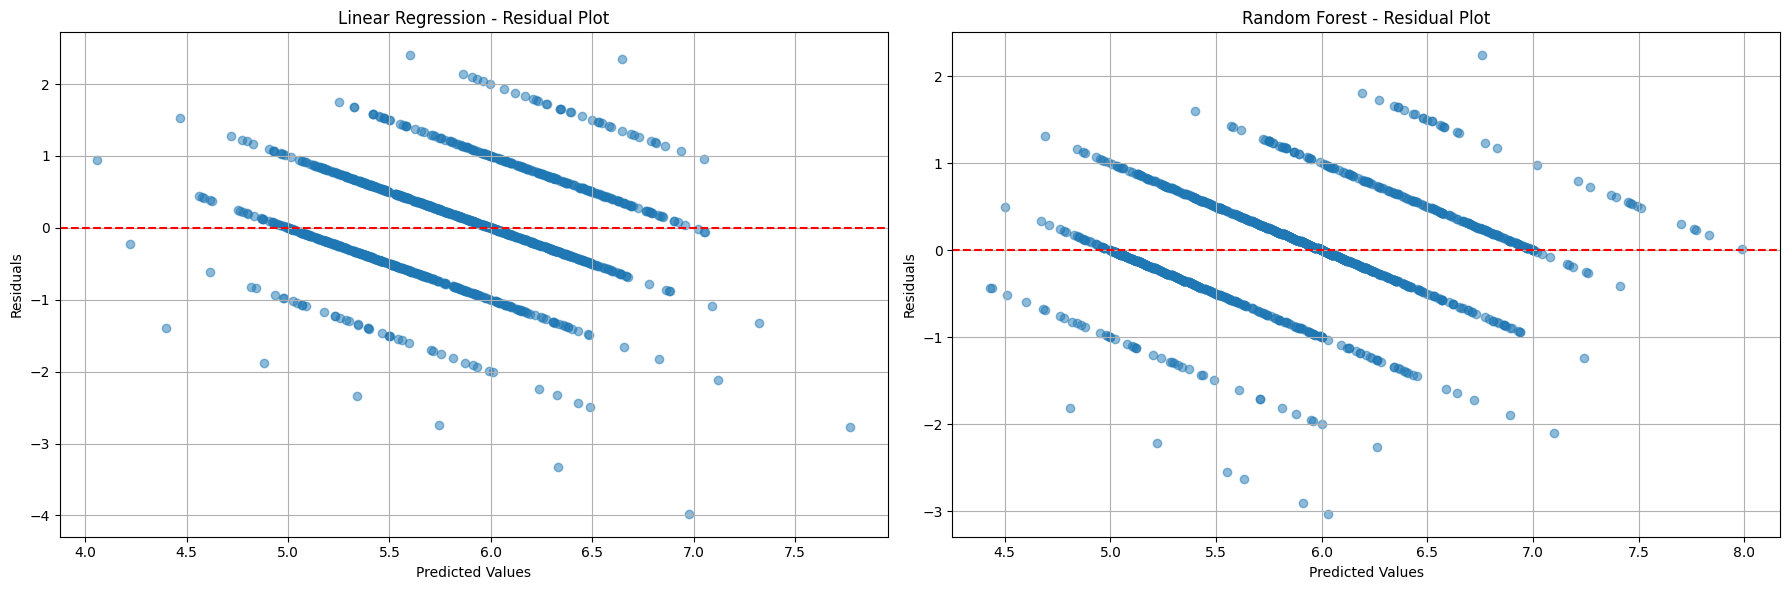

In [233]:
plt.figure(figsize=(18, 6))

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 2, i)
    plt.scatter(result['predictions'], result['residuals'], alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{name} - Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)

plt.tight_layout()
plt.show()

Compare Error Distribution

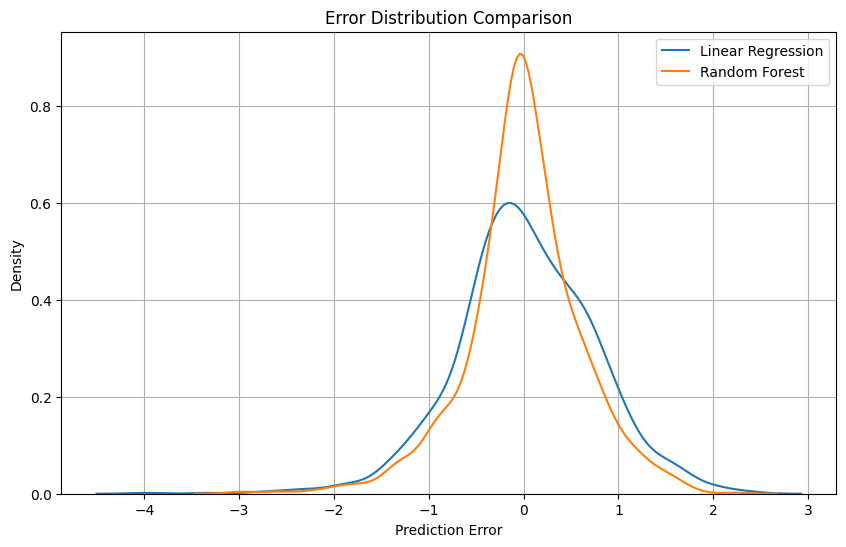

In [234]:
plt.figure(figsize=(10, 6))
sns.kdeplot(results['Linear Regression']['residuals'], label='Linear Regression')
sns.kdeplot(results['Random Forest']['residuals'], label='Random Forest')
plt.title('Error Distribution Comparison')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Model Performance by Wine Type

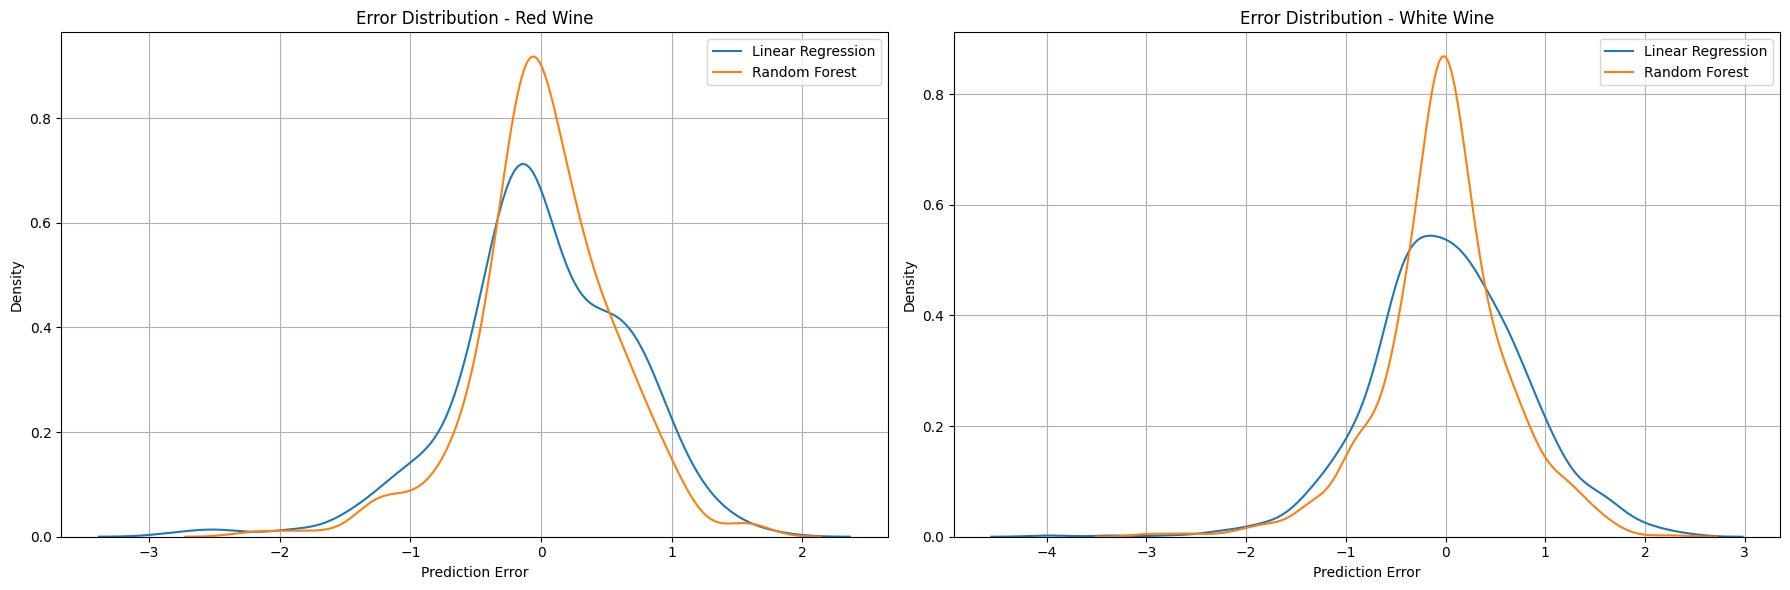

In [235]:
df_test = X_test.copy()
df_test['quality'] = y_test
df_test['type'] = df_test['type'].map({0: 'Red', 1: 'White'})

for model_name in results:
    df_test[f'{model_name}_pred'] = results[model_name]['predictions']
    
plt.figure(figsize=(18, 6))

for i, wine_type in enumerate(['Red', 'White'], 1):
    plt.subplot(1, 2, i)
    subset = df_test[df_test['type'] == wine_type]
    
    for model_name in results:
        sns.kdeplot(subset['quality'] - subset[f'{model_name}_pred'], 
                   label=model_name)
    
    plt.title(f'Error Distribution - {wine_type} Wine')
    plt.xlabel('Prediction Error')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [236]:
# Conclusion
best_model = comparison_df['R²'].idxmax()
print(f"\nBest Model: {metrics_df['R²'].idxmax()} (R²: {metrics_df['R²'].max():.3f})")


Best Model: Random Forest (R²: 0.499)


# Conclusion
Random Forest shows lower MSE, RMSE, and MAE and a higher R² compared to Linear Regression, indicating it captures the data’s nonlinear relationships more effectively and yields better predictive performance overall.

Linear Regression is simpler and more interpretable (you can directly see how each coefficient influences the prediction), but it underperforms relative to Random Forest on this dataset.

Model complexity vs. performance trade-off: While Random Forest is more complex, it provides significantly improved accuracy and can handle non-linearities and interactions between features. Linear Regression, though less accurate, remains a good baseline with clear interpretability.

Thus, Random Forest is the better model here in terms of predictive performance, while Linear Regression retains an advantage in interpretability and simplicity.